In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from matplotlib import pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/datasets/digitrecognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/datasets/digitrecognizer/test.csv
/content/drive/MyDrive/datasets/digitrecognizer/train.csv
/content/drive/MyDrive/datasets/digitrecognizer/sample_submission.csv


In [3]:
train_df=pd.read_csv('/content/drive/MyDrive/datasets/digitrecognizer/train.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train_df['label']
train_df = train_df.drop("label", axis=1)

In [6]:
# IMAGE AUGMENTATION
X_train = train_df.values.astype('float32') / 255
X_test = pd.read_csv("/content/drive/MyDrive/datasets/digitrecognizer/test.csv").values.astype('float32') / 255

In [7]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

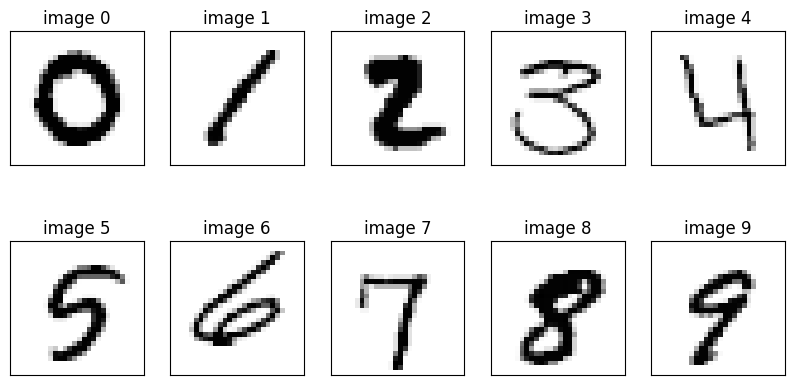

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    mask = y_train==i
    image=X_train[mask][0].reshape((28,28))
    axs[i//5,i%5].set_title(f"image {i}")
    axs[i//5,i%5].imshow(image, cmap = 'Greys')
    axs[i//5,i%5].set_xticks([])
    axs[i//5,i%5].set_yticks([])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 Dense_Layer (Dense)         (None, 128)               2769024   
                                                                 
 outputs (Dense)             (None, 10)                1290      
                                                                 
Total params: 2770634 (10.57 MB)
Trainable params: 2770634 (10.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


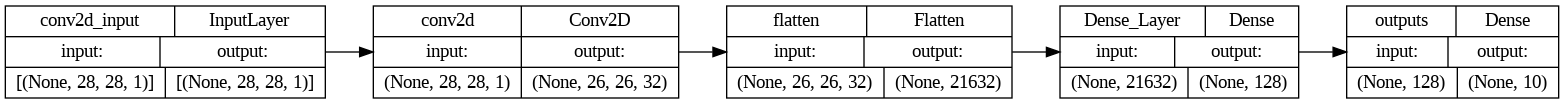

In [9]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu', name="Dense_Layer"))
model.add(layers.Dense(10, activation='softmax', name="outputs"))

model.summary()

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

tf.keras.utils.plot_model(model,show_layer_names=True,expand_nested=True,show_shapes=True,rankdir="LR")